# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rizal Teddyansyah
- **Email:** a299ybm439@devacademy.id
- **ID Dicoding:** rzltdysh

## Menentukan Pertanyaan Bisnis

- Apa saja 10 kategori produk dengan jumlah produk terbanyak?
- Kategori produk apa saja yang memiliki rata-rata jumlah foto terbanyak?
- Kategori produk apa saja yang memiliki rata-rata volume terbesar?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark")

## Data Wrangling

### Gathering Data

- Tabel Products

In [29]:
df_products = pd.read_csv("data/products_dataset.csv")
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


- Tabel Products Translation

In [30]:
df_translation = pd.read_csv("data/product_category_name_translation.csv")
df_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


- Tabel Gabungan antara Product dan Product Translation

In [31]:
# Menggabungakan tabel berdasarkan kolom nama kategori produk
df_merged = df_products.merge(df_translation, on='product_category_name', how='left')
df_merged.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [32]:
# Simpan data gabungan ke Local
df_merged.to_csv('data/product_merged.csv', index=False)  # index=False agar tidak menyimpan index

In [33]:
df = pd.read_csv("data/product_merged.csv")
df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


**Insight:**
- product_id – ID unik untuk setiap produk.
- product_category_name – Nama kategori produk dalam bahasa asli (Portugis Brasil).
- product_category_name_english – Nama kategori produk dalam bahasa Inggris.
- product_name_lenght – Panjang nama produk dalam jumlah karakter.
- product_description_lenght – Panjang deskripsi produk dalam jumlah karakter.
- product_photos_qty – Jumlah foto yang diunggah untuk produk tersebut.
- product_weight_g – Berat produk dalam gram.
- product_length_cm – Panjang produk dalam cm.
- product_height_cm – Tinggi produk dalam cm.
- product_width_cm – Lebar produk dalam cm.

### Assessing Data

In [34]:
# Cek apakah tipe data pada tabel sudah sesuai
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


Dataset ini terdiri dari 10 kolom berisi deskripsi dari setiap produk dimulai dari nama, panjang nama produk dalam jumlah karakter, panjang deskripsi produk dalam jumlah karakter, jumlah foto, berat, panjang, tinggi, lebar, dan nama kategori produk dalam bahasa inggris. 

In [35]:
# Cek apakah terdapat data NULL
df.isnull().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

Dataset terdapat NULL sebanyak 610 untuk kolom nama, panjang nama produk dalam jumlah karakter, panjang deskripsi produk dalam jumlah karakter, jumlah foto, dan 2 untuk kolom berat, panjang, tinggi dan juga lebar dari produk. 

In [36]:
# Cek apakah terdapat data yang duplikat
print("Data Duplikat: ", df.duplicated().sum())

Data Duplikat:  0


In [37]:
# Cek apakah data sesuai (accurate)
df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Dataset memiliki beberapa outlier nilai max yang sangat jauh.

In [38]:
df.describe(include=['object'])

,product_id,product_category_name,product_category_name_english
count,32951,32341,32328
unique,32951,73,71
top,106392145fca363410d287a815be6de4,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


Dataset yang bertipe object ada 3 untuk tipe data dari kolom ID dan juga nama kategori produk ini sudah sesuai. Tetapi ada perbedaan dari jumlahnya itu karena terdapat data NULL pada nama kategori produk sebanyak 610 dan 623 untuk nama kategori produk dalam bahasa Inggris.

In [39]:
# Memilih kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))
outliers.sum()

product_name_lenght            290
product_description_lenght    2078
product_photos_qty             849
product_weight_g              4551
product_length_cm             1380
product_height_cm             1892
product_width_cm               912
dtype: int64

**Insight:**
- Terdapat NULL untuk sebanyak 610 data untuk kolom nama, panjang nama produk dalam jumlah karakter, panjang deskripsi produk dalam jumlah karakter, jumlah foto, 2 data untuk kolom berat, panjang, tinggi dan juga lebar dari produk, dan 623  data untuk kolom nama kategori produk dalam Bahasa Inggris.
- Tidak ada data duplikat.
- Terdapat outlier.

### Cleaning Data

In [40]:
# Cek apakah persentase data NULL terhitung banyak
null_percentage = (610 / len(df)) * 100
print(f"Persentase data NULL: {null_percentage:.2f}%")

Persentase data NULL: 1.85%


In [41]:
# Menghapus baris yang memiliki NULL di kolom nama kategori produk
df_cleaned = df.dropna(subset=['product_category_name']).copy()

# Mengecek kembali jumlah NULL setelah penghapusan
print(df_cleaned.isnull().sum())

product_id                        0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  1
product_length_cm                 1
product_height_cm                 1
product_width_cm                  1
product_category_name_english    13
dtype: int64


Data NULL dihapus karena jumlah data yang cukup besar dan setelah dihitung persentase data juga hanya sekitar 1.85% tidak terlalu berpengaruh, tetapi masih ada data NULL di kolom berat, panjang, tinggi, dan juga lebar produk.

In [42]:
# Mengisi Nilai NULL dengan nilai rata-rata
df_cleaned['product_weight_g'] = df_cleaned['product_weight_g'].fillna(df_cleaned['product_weight_g'].median())
df_cleaned['product_length_cm'] = df_cleaned['product_length_cm'].fillna(df_cleaned['product_length_cm'].median())
df_cleaned['product_height_cm'] = df_cleaned['product_height_cm'].fillna(df_cleaned['product_height_cm'].median())
df_cleaned['product_width_cm'] = df_cleaned['product_width_cm'].fillna(df_cleaned['product_width_cm'].median())

Data NULL yang bernilai hanya 1 dapat diisi dengan nilai rata-rata dari setiap kolom.

In [43]:
# Mengisi nilai NULl dengan "unknown"
df_cleaned['product_category_name_english'] = df_cleaned['product_category_name_english'].fillna('unknown')

Data NULL untuk kategori produk dalam bahasa Inggris diisi dengan "Unknown".

In [44]:
# Mengecek kembali jumlah NULL setelah penghapusan
print(df_cleaned.isnull().sum())

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64


Tidak ada data NULL

In [45]:
# Menghapus outlier
condition = (df_cleaned[numerical_columns] >= (Q1 - 1.5 * IQR)) & (df_cleaned[numerical_columns] <= (Q3 + 1.5 * IQR))
df_cleaned = df_cleaned[condition.all(axis=1)]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24148 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     24148 non-null  object 
 1   product_category_name          24148 non-null  object 
 2   product_name_lenght            24148 non-null  float64
 3   product_description_lenght     24148 non-null  float64
 4   product_photos_qty             24148 non-null  float64
 5   product_weight_g               24148 non-null  float64
 6   product_length_cm              24148 non-null  float64
 7   product_height_cm              24148 non-null  float64
 8   product_width_cm               24148 non-null  float64
 9   product_category_name_english  24148 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.0+ MB


Menghapus outlier karena nilai nya terlampau jauh dari Q3

In [46]:
# Menyimpan DataFrame ke file CSV
final = 'dashboard/product_final.csv'
df_cleaned.to_csv(final, index=False)  # index=False agar tidak menyimpan index

print(f"DataFrame berhasil disimpan sebagai {final}")

DataFrame berhasil disimpan sebagai dashboard/product_final.csv


**Insight:**
- Karena jumlah data null dari data keseluruhan hanya 1.85% jadi data NULL untuk kategori nama produk di hapus.
- Kolom berat, panjang, tinggi, dan juga lebar produk diisi dengan nilai rata-rata dari setiap kolom.
- Data NULL untuk kategori nama produk dalam bahasa Inggris diisi dengan "Unknown" atau tidak diketahui.

## Exploratory Data Analysis (EDA)

### Explore Product Dataset

In [47]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24148 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     24148 non-null  object 
 1   product_category_name          24148 non-null  object 
 2   product_name_lenght            24148 non-null  float64
 3   product_description_lenght     24148 non-null  float64
 4   product_photos_qty             24148 non-null  float64
 5   product_weight_g               24148 non-null  float64
 6   product_length_cm              24148 non-null  float64
 7   product_height_cm              24148 non-null  float64
 8   product_width_cm               24148 non-null  float64
 9   product_category_name_english  24148 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.0+ MB


In [48]:
df_cleaned.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,24148.000000,24148.000000,24148.000000,24148.000000,24148.000000,24148.000000,24148.000000
mean,48.307065,638.355972,1.963765,821.919165,26.225112,13.525923,20.400157
std,9.879252,410.580547,1.326128,821.256666,11.026028,8.301137,8.543944
min,20.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,320.000000,1.000000,250.000000,17.000000,7.000000,14.000000
50%,51.000000,549.000000,1.000000,500.000000,22.000000,12.000000,18.000000
75%,56.000000,860.000000,3.000000,1100.000000,32.000000,18.000000,25.000000
max,76.000000,1920.000000,6.000000,4300.000000,68.000000,40.000000,52.000000


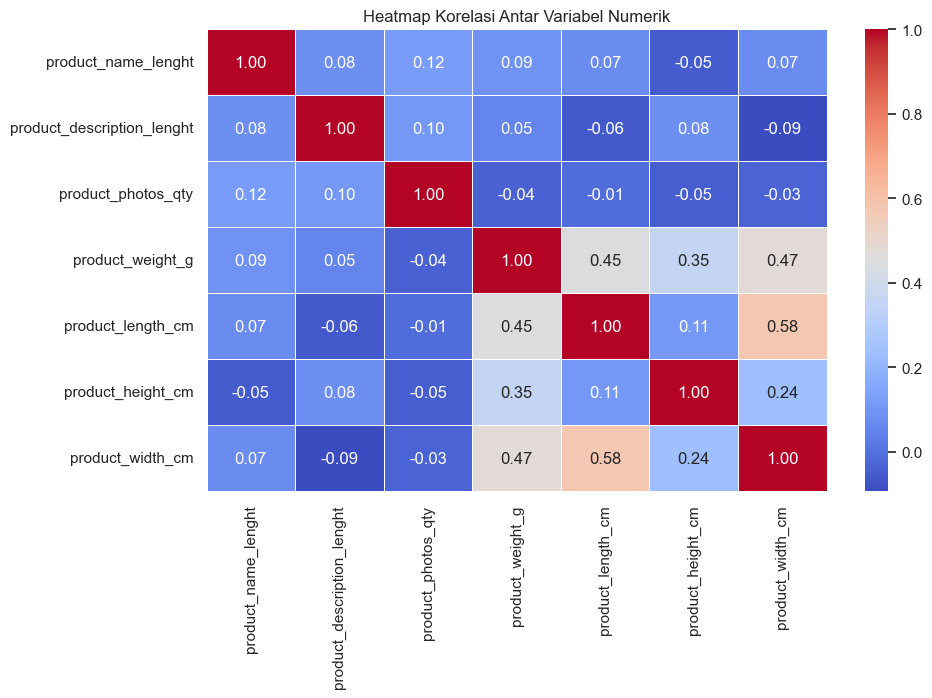

In [49]:
# Menghitung korelasi matrix untuk kolom numerik
correlation_matrix = df_cleaned.select_dtypes(include=["number"]).corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [50]:
# Hitung volume produk
df_cleaned['volume_cm3'] = df_cleaned['product_length_cm'] * df_cleaned['product_height_cm'] * df_cleaned['product_width_cm']

# Rata-rata volume per kategori
volume_categories = df_cleaned.groupby('product_category_name_english')['volume_cm3'].mean().sort_values(ascending=False).head(10)

Membuat rumus untuk menghitung volume produk berdasarkan panjang lebar dan tinggi dari setiap kategori produk. Berdasarkan 10 data teratas `furniture_decor` memiliki volume terbesar yaitu 12800 cm3.

In [51]:
# Hitung rata-rata jumlah foto per kategori
photo_categories = df_cleaned.groupby('product_category_name_english')['product_photos_qty'].mean().sort_values(ascending=False).head(10)

Membuat rumus untuk menghitung rata-rata foto setiap kategori produk. Berdasarkan 10 data teratas `fashion_shoes` memiliki rata-rata foto terbanyak yaitu 3.9.

**Insight:**
- Berdasarkan 10 data teratas furniture_decor memiliki volume terbesar yaitu 12800 cm3.
- Berdasarkan 10 data teratas `fashion_shoes` memiliki rata-rata foto terbanyak yaitu 3.9.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja 10 kategori produk dengan jumlah produk terbanyak?

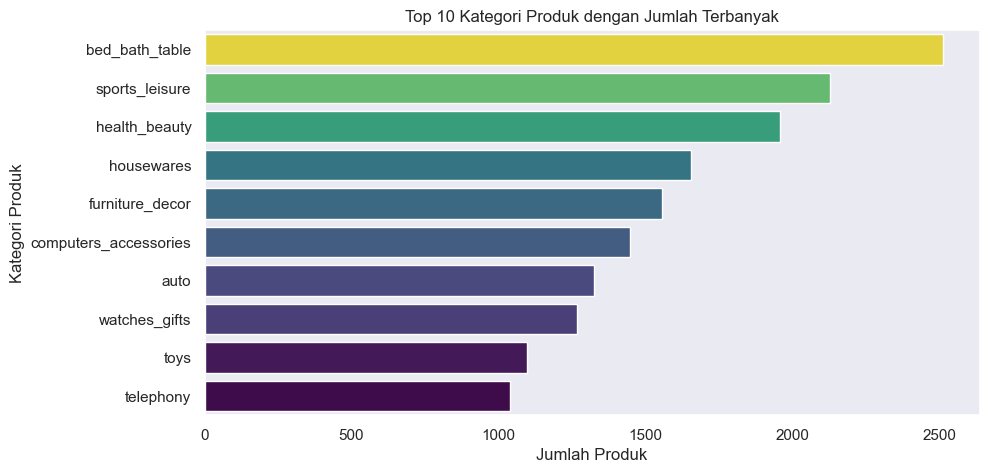

In [57]:
# Distribusi Kategori Produk (Top 10)
plt.figure(figsize=(10, 5))
top_categories = df_cleaned["product_category_name_english"].value_counts().head(10)
sns.barplot(y=top_categories.index, x=top_categories.values, hue=top_categories, palette='viridis', legend=False)
plt.xlabel("Jumlah Produk")
plt.ylabel("Kategori Produk")
plt.title("Top 10 Kategori Produk dengan Jumlah Terbanyak")
plt.show()

Kategori `bed_bath_table` menjadi yang paling mendominasi dalam jumlah produk, diikuti oleh `sports_leisure` dan `health_beauty`. Hal ini menunjukkan bahwa konsumen dan penjual cenderung lebih aktif di kategori-kategori tersebut. Bisnis dapat memprioritaskan kategori ini dalam strategi pemasaran atau memperluas produk pada kategori populer untuk menjangkau pasar yang lebih luas.

### Pertanyaan 2: Kategori produk apa saja yang memiliki rata-rata jumlah foto terbanyak?

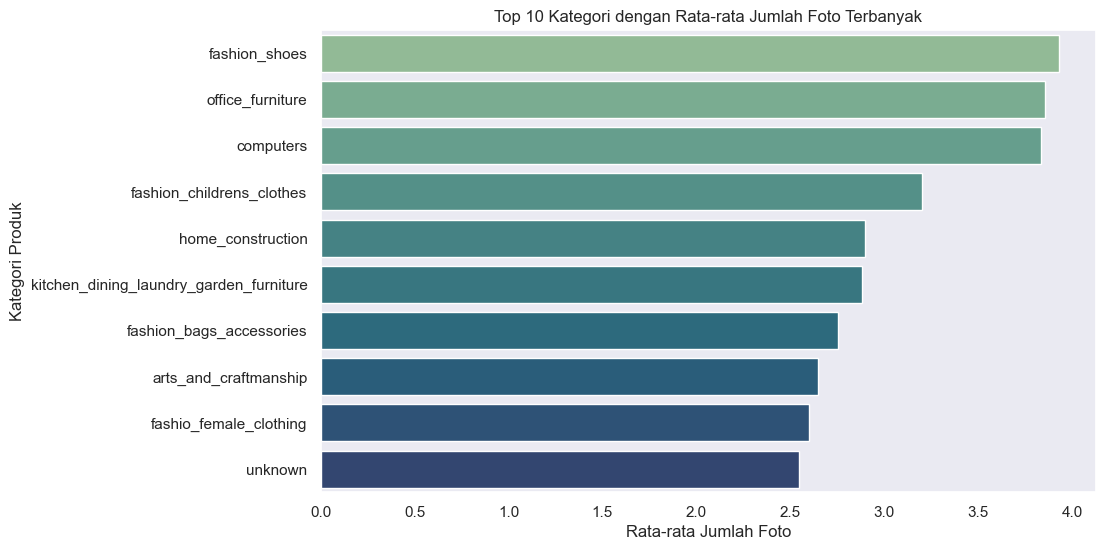

In [53]:
# Distribusi Jumlah Photo Kategori Produk
plt.figure(figsize=(10,6))
sns.barplot(y=photo_categories.index, x=photo_categories.values, palette="crest", hue=photo_categories.index, legend=False)
plt.title("Top 10 Kategori dengan Rata-rata Jumlah Foto Terbanyak")
plt.xlabel("Rata-rata Jumlah Foto")
plt.ylabel("Kategori Produk")
plt.show()

Kategori produk seperti sepatu `fashion_shoes`, `office_furniture`, dan `computers` cenderung disajikan dengan lebih banyak foto per produk, kemungkinan besar karena pembeli perlu melihat detail produk sebelum membeli. Kategori fashion mendominasi top list, menandakan pentingnya kualitas visual untuk menarik perhatian pelanggan.

### Pertanyaan 3: Kategori produk apa saja yang memiliki rata-rata volume terbesar?

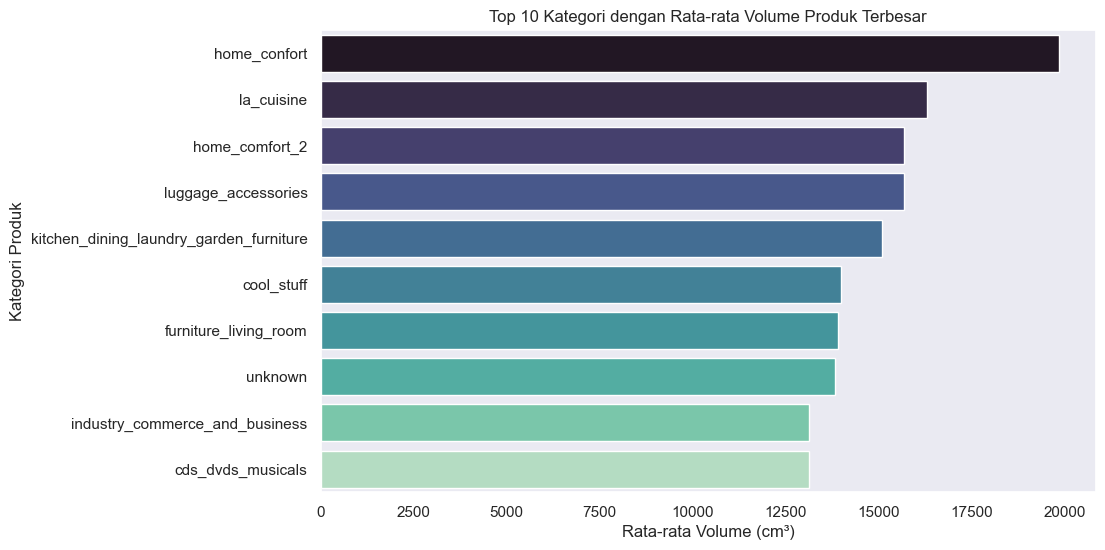

In [56]:
# Distribusi Volume Kategori Produk
plt.figure(figsize=(10,6))
sns.barplot(y=volume_categories.index, x=volume_categories.values, hue=volume_categories.index, palette="mako")
plt.title("Top 10 Kategori dengan Rata-rata Volume Produk Terbesar")
plt.xlabel("Rata-rata Volume (cm³)")
plt.ylabel("Kategori Produk")
plt.show()

Kategori `home_confort` menjadi yang paling mendominasi dalam volume produk, diikuti oleh `la_cuisine` dan `home_comfort_2`. Hal ini menunjukkan bahwa produk-produk dalam kategori ini secara fisik cenderung berukuran besar (mungkin seperti alat rumah tangga besar atau perabotan ringan).

**Insight:**
- Kategori `bed_bath_table` menjadi yang paling mendominasi dalam jumlah produk, diikuti oleh `sports_leisure` dan `health_beauty`.
- Kategori produk seperti sepatu `fashion_shoes`, `office_furniture`, dan `computers` cenderung disajikan dengan lebih banyak foto per produk.
- Kategori `home_confort` menjadi yang paling mendominasi dalam volume produk, diikuti oleh `la_cuisine` dan `home_comfort_2`.

## Conclusion

- Kategori dengan jumlah produk terbanyak adalah `bed_bath_table`, diikuti oleh `sports_leisure` dan `health_beauty`. Hal ini menunjukkan bahwa kategori-kategori tersebut merupakan segmen yang paling ramai, baik dari sisi penjual maupun konsumen. Banyaknya produk yang tersedia mengindikasikan tingginya permintaan atau minat terhadap produk-produk dalam kategori tersebut, sehingga bisa menjadi peluang menarik bagi pelaku bisnis yang ingin masuk ke pasar yang aktif.
- Kategori `fashion_shoes`, `office_furniture`, dan `computers` menempati posisi teratas dalam hal rata-rata jumlah foto produk. Ini mencerminkan pentingnya aspek visual dalam menarik minat pembeli, khususnya untuk produk-produk yang sangat bergantung pada tampilan fisik. Kategori dengan foto yang lebih banyak cenderung memiliki representasi produk yang lebih baik, yang dapat meningkatkan kepercayaan pembeli dan kemungkinan konversi.
- Kategori `home_comfort`, `la_cuisine`, dan `home_comfort_2` memiliki rata-rata volume produk terbesar, yang menunjukkan bahwa produk-produk dalam kategori ini umumnya berukuran besar dan membutuhkan perhatian khusus dalam aspek logistik. Produk dengan volume besar berpotensi meningkatkan biaya pengemasan dan pengiriman, sehingga penting bagi penjual untuk mempertimbangkan efisiensi distribusi dalam kategori ini.